In [4]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

sys.path.append("../src")
from logistic_regression import *

%matplotlib inline
import seaborn as sns

In [5]:
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (13,10)

# Problem 2

The empirical risk is given by $\mathbf{E}[\ell(y, \hat{y}) | x]$, where the expectation is taken over $y$. For a margin based loss function, we have the form $\mathbf{E}[\ell(y\hat{y}) | x]$

### Problem 2.1

If our prediction is given by $\hat{y} = f(x)$ and $\pi(x) = p(y=1|x)$ then we can write the empirical risk as 

$$
\begin{align*}
\mathbf{E}[\ell(yf(x)|x] &= p(y=1|x)\ell(f(x)) + p(y=-1|x)\ell(-f(x))\\
&= \pi(x)\ell(f(x)) + (1-\pi(x))\ell(-f(x))\\
&= \ell(-f(x)) + \pi(x)(\ell(f(x)) - \ell(-f(x))
\end{align*}
$$

### Problem 2.2

The exponential loss is given by $\ell(y,f(x)) = e^{-yf(x)}$. Using the result of 2.1 we have 

$$
\begin{align*}
\mathbf{E}[\ell(yf(x)|x] &= e^{f(x)} + \pi(x)(e^{-f(x)} - e^{f(x)})\\
\end{align*}
$$

For a fixed $x$ we can differentiate wrt to $f(x)$ to find the empirical risk minimizer

$$
\begin{align*}
0 &= \frac{d}{df(x)}\left[e^{f(x)} + \pi(x)(e^{-f(x)} - e^{f(x)})\right]\\
0 &= e^{f(x)} + \pi(x)\left(-e^{-f(x)} - e^{f(x)}\right)\\
\pi(x) &= \frac{-e^{f(x)}}{y\left(-e^{-f(x)} - e^{f(x)}\right)}\\
\pi(x) &= \frac{1}{\left(e^{-2f(x)} + 1\right)}\\
\end{align*}
$$

The optimal prediction function can be solved from the conditional probability

$$
\begin{align*}
\pi(x) &= \frac{1}{\left(e^{-2f(x)} + 1\right)}\\
\frac{1}{\pi(x)} -1 &= e^{-2f(x)}\\
-2f(x) &= \log\left(\frac{1 - \pi(x)}{\pi(x)}\right)\\
f(x) &= \frac{1}{2}\log\left(\frac{\pi(x)}{1 - \pi(x)}\right)\\
\end{align*}
$$

### Problem 2.3

The logistic loss function is given by $\ell(y, f(x)) = \log\left(1+e^{-yf(x)}\right)$. Using 2.1 we can again write the empirical risk minimizer as 

$$
\begin{align*}
\mathbf{E}[\ell(yf(x))|x] &= \log(1+e^{f(x)}) + \pi(x)\left[\log(1+ e^{-f(x)}) - \log(1+e^{f(x)})\right]\\
\end{align*}
$$

Taking the derivative wrt to $f(x)$ we find the conditional probability of the empirical risk minimizer

$$
\begin{align*}
0 &= \frac{e^{f(x)}}{1+e^{f(x)}} + \pi(x)\left[\frac{-e^{-f(x)}}{1+e^{-f(x)}} - \frac{e^{f(x)}}{1+e^{f(x)}}\right]\\
\frac{-e^{f(x)}}{1+e^{f(x)}} &= \pi(x)\left[\frac{-e^{-f(x)}}{1+e^{-f(x)}} - \frac{1}{1+e^{-f(x)}}\right]\\
\pi(x) &= \frac{1}{1+e^{-f(x)}}
\end{align*}
$$

### Problem 2.4

The hinge loss is given by $\ell(y, f(x)) = \max(0, 1- yf(x))$. From 2.1 we have the empirical risk

$$
\begin{align*}
\mathbf{E}[\ell(yf(x))|x] &= \max(0, 1 + f(x)) + \pi(x)\left[\max(0, 1 - f(x)) - \max(0, 1 + f(x)))\right]\\
\end{align*}
$$

### Problem 3.1

### Problem 3.3

The logistictic regression function with target $y\in \{-1,1\}$ is given by 

$$J(w) = \lambda ||w||^2 + \frac{1}{n} \sum_{i=1}^n \log (1 + \text{exp}(-y_iw^Tx_i))$$

We can show this function is convex by finding the hessian and proving it is positive semidefinite. The total derivative is given by 

$$
\begin{align*}
DJ &= \lambda w^T + \frac{1}{n} \sum_{i=1}^n \frac{1}{1 + \text{exp}(-y_iw^Tx_i)}\cdot \text{exp}(-y_iw^Tx_i) \cdot (-y_ix_i^T) \\
\nabla J &= \lambda w + \frac{1}{n}\sum_{i=1}^n \frac{1}{1 + \text{exp}(y_iw^Tx_i)} \cdot (-y_ix_i) \\
&= \lambda w - \frac{1}{n}\sum_{i=1}^n \sigma(-y_iw^Tx_i) \cdot (y_ix_i) \\
&= \lambda w - \frac{1}{n}\sum_{i=1}^n \left(1-\sigma(y_iw^Tx_i)\right) \cdot (y_ix_i) \\
D(\nabla J) &= \lambda I + \frac{1}{n}\sum_{i=1}^n \sigma(y_iw^Tx_i)\left(1-\sigma(y_iw^Tx_i)\right) \cdot (y_ix_i)D(y_iw^Tx_i) \\
&= \lambda I + \frac{1}{n}\sum_{i=1}^n \sigma(y_iw^Tx_i)\left(1-\sigma(y_iw^Tx_i)\right) \cdot (y^2_ix_ix_i^T)\\
&= \lambda I + \frac{1}{n}\sum_{i=1}^n \sigma(y_iw^Tx_i)\left(1-\sigma(y_iw^Tx_i)\right) \cdot (x_ix_i^T)\\
&= \lambda I + X^T\mathbf{diag}\left(\sigma(y_1w^Tx_1)\left(1-\sigma(y_1w^Tx_1)\right),\ldots,\sigma(y_nw^Tx_n)\left(1-\sigma(y_nw^Tx_n)\right)\right)X\\
&= \lambda I + X^TWX\\
\end{align*}
$$
where $X\in \mathbf{R}^{n\times d}$

We can easily verify this matrix to be PSD 
$$
\begin{align*}
z^T(HJ)z &= z^T\left(\lambda I + X^TWX\right)z\\
&= \lambda ||z||^2 + z^TX^TWXz\\
&= \lambda ||z||^2 + ||W^{1/2}Xz||^2\\
&\ge 0
\end{align*}
$$

In [6]:
X_train = np.loadtxt(os.path.join('..', 'data', 'X_train.txt'),delimiter=',')
y_train = 2* np.loadtxt(os.path.join('..', 'data', 'y_train.txt')) - 1

X_val = np.loadtxt(os.path.join('..', 'data', 'X_val.txt'),delimiter=',')
y_val = 2 * np.loadtxt(os.path.join('..', 'data', 'y_val.txt')) - 1

In [7]:
regularization_path = 10 ** np.linspace(-3,1, 100) 
validation_loss = np.zeros_like(regularization_path)

w = np.zeros_like(X_train[0,:])
best_loss = np.infty
best_w = None
best_lambda = -1.0
for i, lam in enumerate(regularization_path):
    w = fit_logistic_reg(X_train, y_train, log_loss, l2_param=lam, theta_init=w)
    validation_loss[i] = log_loss(w, X_val, y_val, l2_param=0)

    if validation_loss[i] < best_loss:
        best_w = w
        best_lambda = lam
        best_loss = validation_loss[i]

print('Optimal regularization: {0:.3E}'.format(best_lambda))

Optimal regularization: 3.126E-02


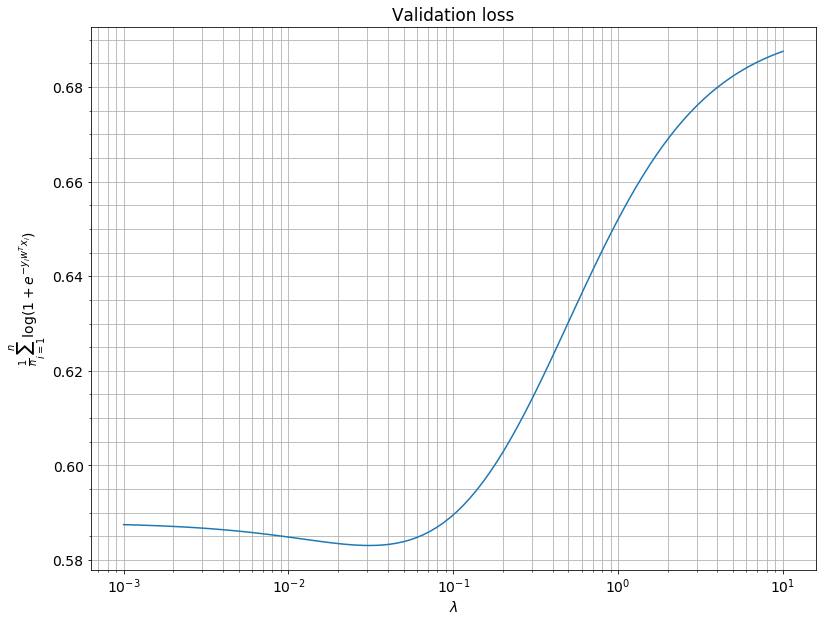

In [8]:
plt.semilogx(regularization_path, validation_loss)
plt.title('Validation loss')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{1}{n}\sum_{i=1}^n \log\left(1+e^{-y_iw^Tx_i}\right)$', fontsize=14)
plt.grid(True, which='minor')
plt.minorticks_on()
plt.show()


In [25]:
prob_class_1 = 1.0/(1 + np.exp(-X_val.dot(best_w)))
prob_true, prob_pred = calibration_curve(y_val, prob_class_1, n_bins=10)

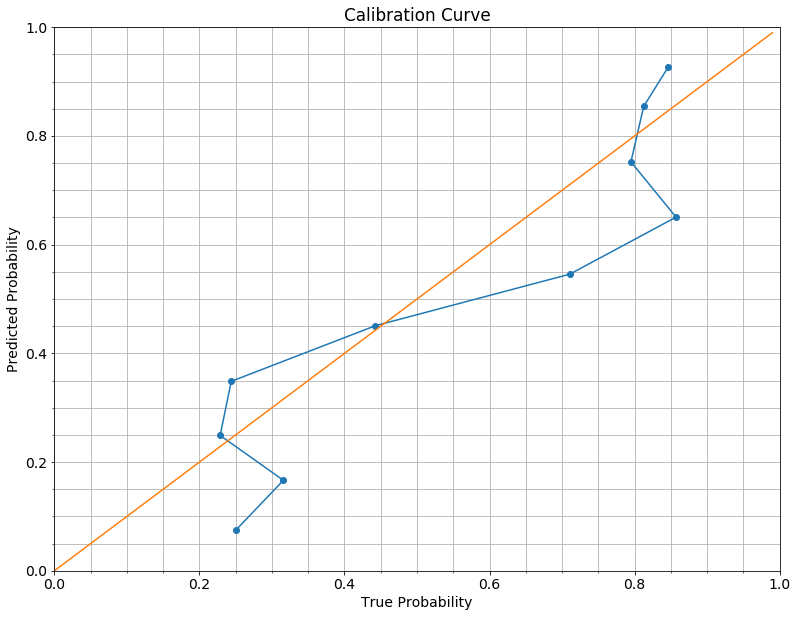

In [26]:
plt.plot(prob_true, prob_pred,marker='o')
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01))
plt.title('Calibration Curve')
plt.xlabel(r'True Probability')
plt.ylabel(r'Predicted Probability', fontsize=14)
plt.grid(True, which='minor')
plt.minorticks_on()

plt.xlim([0,1]);
plt.ylim([0,1]);
plt.show();